## HW2: Comparing PCA and ICA 
Tip: Don't wait until the last day to do it.

## Dataset:
Labeled Faces in the Wild (LFW) people dataset

## Method:
PCA and ICA

## What you need to do:
Applying PCA to extract the eigenfaces of the dataset

Representing the data using eigenfaces (transforming the data)

Using SVM to classify the transformed data

Try different parameters for PCA

Repeat the above, but change PCA to ICA.

## write a simple report with the information below:

Result part:

quantitative results of different parameters for both PCA and ICA (in table)

visualization examples of the extracted eigenfaces for both PCA and ICA

discussion part:

what parameters perform the best and why

## Submission:
Code file (.py/.ipynb/.zip). 
Report file (.doc/.docx).
Please submit them separately.

This is a group assignment, only one submission is needed for each group.

## Grading:
Total: 100 points

Coding and results(30 points for each method)

Discussion (20 points for each method)

## References:
https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.htmlLinks to an external site. 

https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.htmlLinks to an external site. 

Reference 1 is a face recognition example using PCA to extract eigenfaces and using SVM as the classifier.

Reference 2 is an application of ICA. However, it's not directly applied to the face recognition dataset. you will need to figure out how to adapt it to the given dataset.

In [1]:
from time import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,FastICA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [2]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y_pred, y_test, target_names, i):
        pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
        true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
        return "predicted: %s\ntrue:      %s" % (pred_name, true_name)

In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##  PCA



Extracting the top 50 eigenfaces from 966 faces
 PCA  -  done in 0.244s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.010s
Fitting the classifier to the training set
PCA - done in 4.254s
Best estimator found by grid search:
For PCA -  SVC(C=5273.285108509626, class_weight='balanced', gamma=0.01879651022266821)
PCA - Predicting people's names on the test set
done in 0.038s
                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.77      0.83        13
     Colin Powell       0.89      0.80      0.84        60
  Donald Rumsfeld       0.52      0.48      0.50        27
    George W Bush       0.80      0.92      0.85       146
Gerhard Schroeder       0.63      0.76      0.69        25
      Hugo Chavez       0.67      0.13      0.22        15
       Tony Blair       0.58      0.50      0.54        36

         accuracy                           0.76       322
        macro avg       0.71      0.62      0.64       322

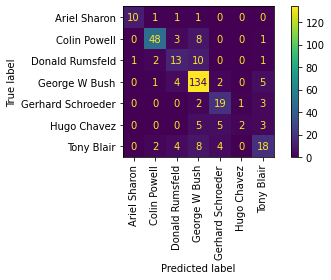


-------------------------------------------------------



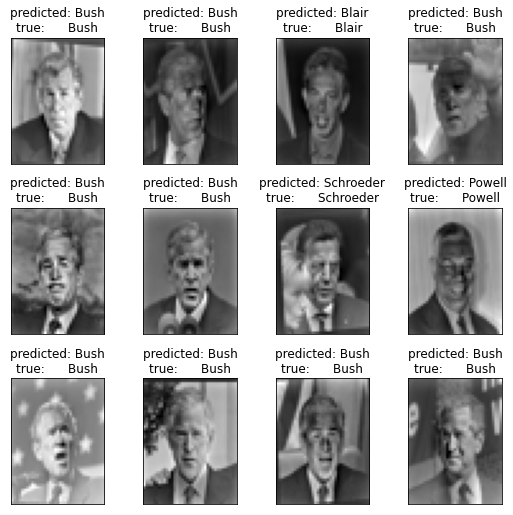


-------------------------------------------------------



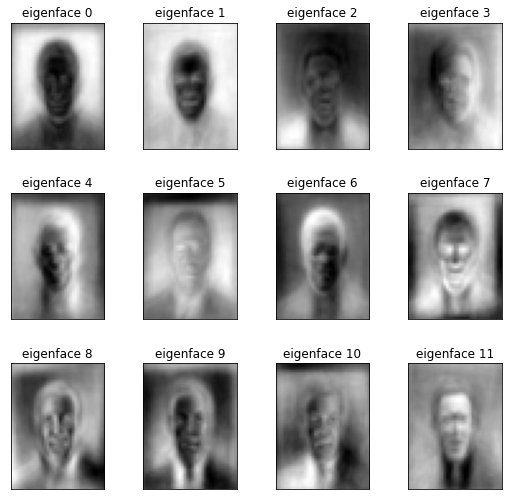



Extracting the top 100 eigenfaces from 966 faces
 PCA  -  done in 0.083s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.011s
Fitting the classifier to the training set
PCA - done in 4.800s
Best estimator found by grid search:
For PCA -  SVC(C=89367.47418101376, class_weight='balanced', gamma=0.004533754172740904)
PCA - Predicting people's names on the test set
done in 0.042s
                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.85      0.88        13
     Colin Powell       0.87      0.92      0.89        60
  Donald Rumsfeld       0.72      0.67      0.69        27
    George W Bush       0.88      0.94      0.91       146
Gerhard Schroeder       0.83      0.80      0.82        25
      Hugo Chavez       0.89      0.53      0.67        15
       Tony Blair       0.79      0.75      0.77        36

         accuracy                           0.86       322
        macro avg       0.84      0.78      0.80       3

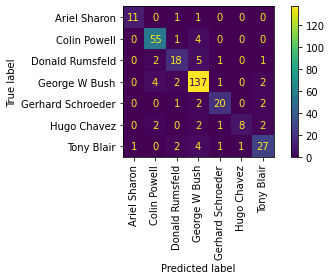


-------------------------------------------------------



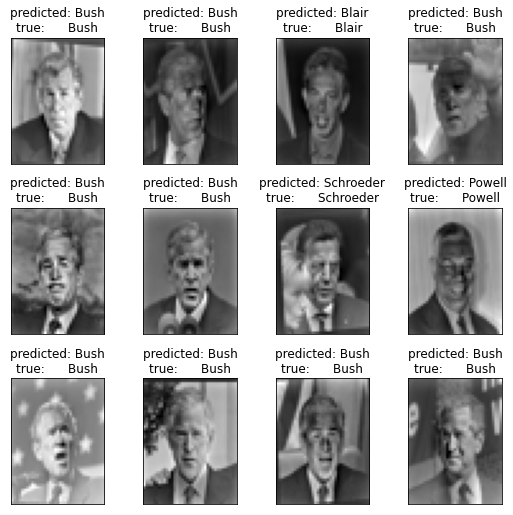


-------------------------------------------------------



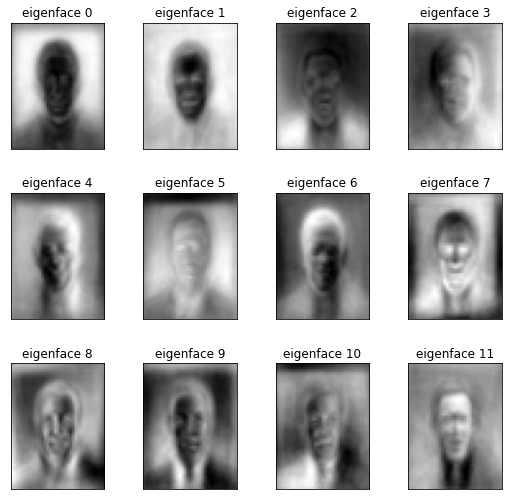



Extracting the top 150 eigenfaces from 966 faces
 PCA  -  done in 0.171s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.014s
Fitting the classifier to the training set
PCA - done in 6.643s
Best estimator found by grid search:
For PCA -  SVC(C=3240.4874956327903, class_weight='balanced', gamma=0.0032485301532869716)
PCA - Predicting people's names on the test set
done in 0.040s
                   precision    recall  f1-score   support

     Ariel Sharon       0.85      0.85      0.85        13
     Colin Powell       0.90      0.88      0.89        60
  Donald Rumsfeld       0.77      0.63      0.69        27
    George W Bush       0.88      0.97      0.92       146
Gerhard Schroeder       0.75      0.84      0.79        25
      Hugo Chavez       1.00      0.40      0.57        15
       Tony Blair       0.91      0.81      0.85        36

         accuracy                           0.87       322
        macro avg       0.86      0.77      0.80      

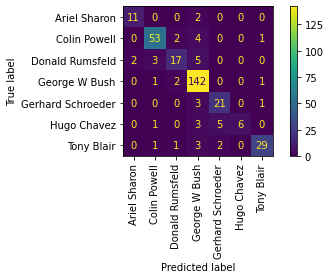


-------------------------------------------------------



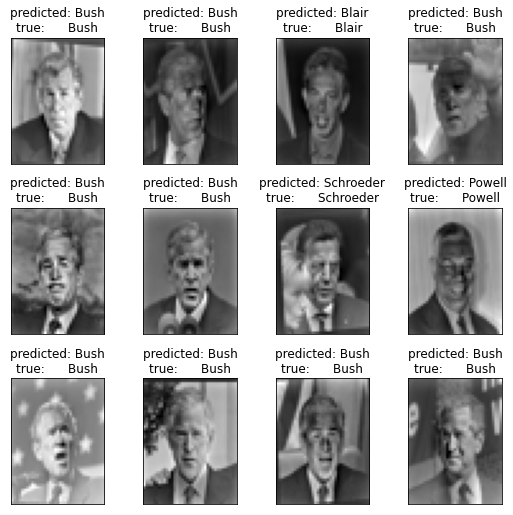


-------------------------------------------------------



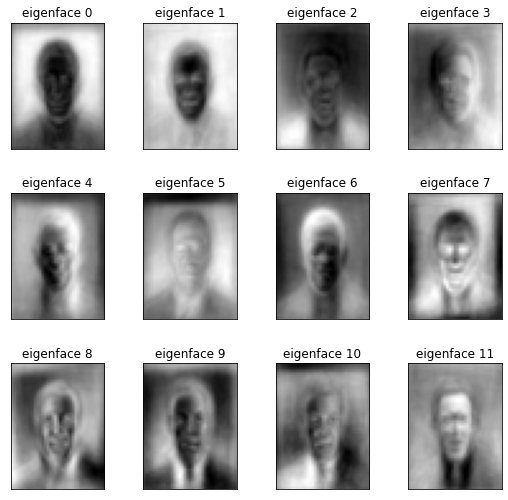



Extracting the top 200 eigenfaces from 966 faces
 PCA  -  done in 0.159s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.018s
Fitting the classifier to the training set
PCA - done in 6.552s
Best estimator found by grid search:
For PCA -  SVC(C=23665.98556268467, class_weight='balanced', gamma=0.0019699362070342385)
PCA - Predicting people's names on the test set
done in 0.044s
                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.77      0.80        13
     Colin Powell       0.87      0.88      0.88        60
  Donald Rumsfeld       0.73      0.70      0.72        27
    George W Bush       0.90      0.96      0.93       146
Gerhard Schroeder       0.83      0.76      0.79        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.73      0.75      0.74        36

         accuracy                           0.85       322
        macro avg       0.84      0.76      0.78       

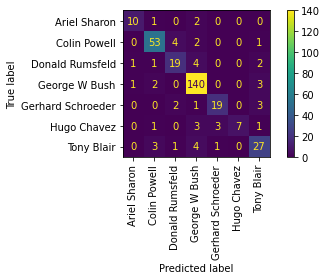


-------------------------------------------------------



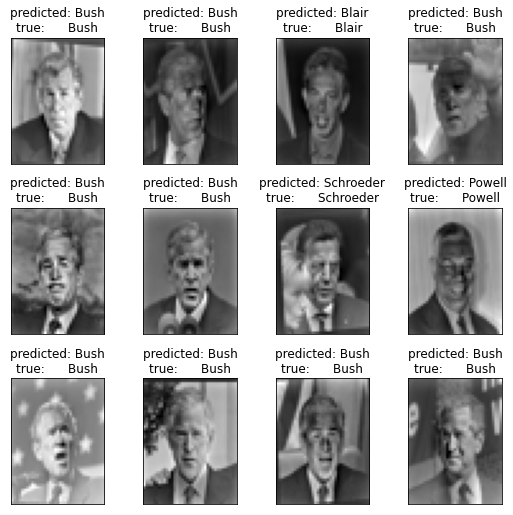


-------------------------------------------------------



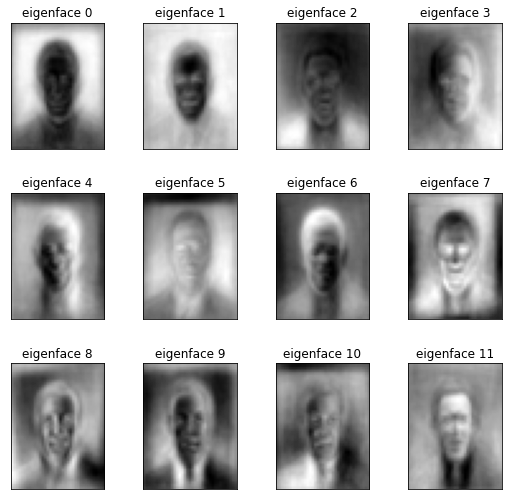



Extracting the top 300 eigenfaces from 966 faces
 PCA  -  done in 0.186s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.015s
Fitting the classifier to the training set
PCA - done in 8.812s
Best estimator found by grid search:
For PCA -  SVC(C=3174.13646276154, class_weight='balanced', gamma=0.0005038021966552339)
PCA - Predicting people's names on the test set
done in 0.053s
                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.85      0.81        13
     Colin Powell       0.85      0.88      0.87        60
  Donald Rumsfeld       0.63      0.70      0.67        27
    George W Bush       0.86      0.91      0.89       146
Gerhard Schroeder       0.81      0.68      0.74        25
      Hugo Chavez       0.67      0.53      0.59        15
       Tony Blair       0.90      0.72      0.80        36

         accuracy                           0.83       322
        macro avg       0.79      0.75      0.77       3

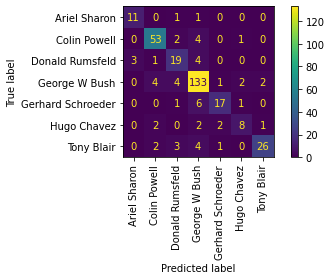


-------------------------------------------------------



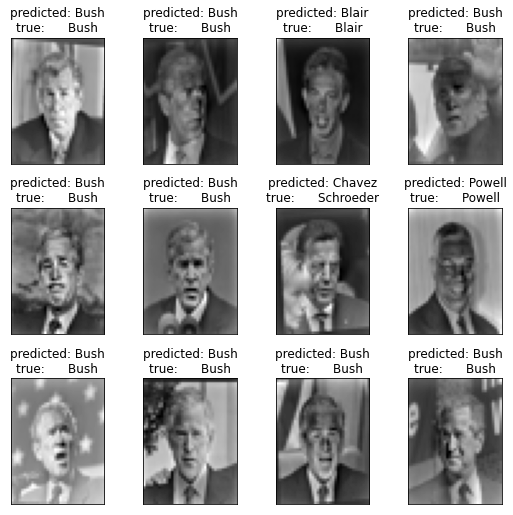


-------------------------------------------------------



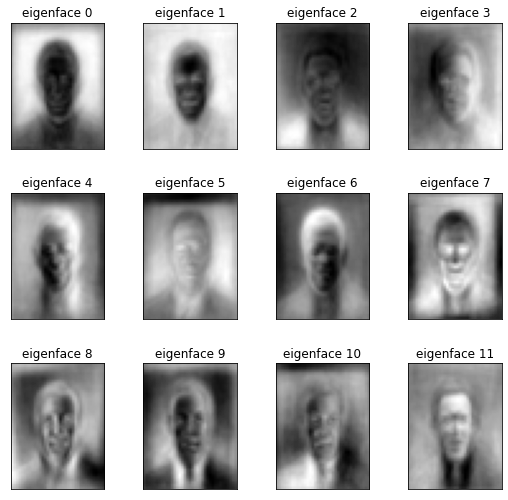



Extracting the top 400 eigenfaces from 966 faces
 PCA  -  done in 0.273s
Projecting the input data on the eigenfaces orthonormal basis - PCA
done in 0.019s
Fitting the classifier to the training set
PCA - done in 10.566s
Best estimator found by grid search:
For PCA -  SVC(C=7327.899531695545, class_weight='balanced', gamma=0.00047116461390935173)
PCA - Predicting people's names on the test set
done in 0.065s
                   precision    recall  f1-score   support

     Ariel Sharon       0.82      0.69      0.75        13
     Colin Powell       0.82      0.90      0.86        60
  Donald Rumsfeld       0.64      0.67      0.65        27
    George W Bush       0.87      0.94      0.90       146
Gerhard Schroeder       0.79      0.76      0.78        25
      Hugo Chavez       0.80      0.53      0.64        15
       Tony Blair       1.00      0.72      0.84        36

         accuracy                           0.84       322
        macro avg       0.82      0.74      0.77     

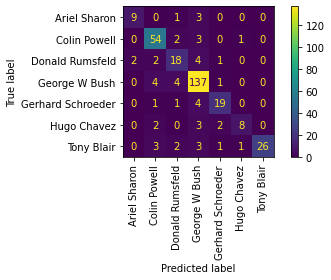


-------------------------------------------------------



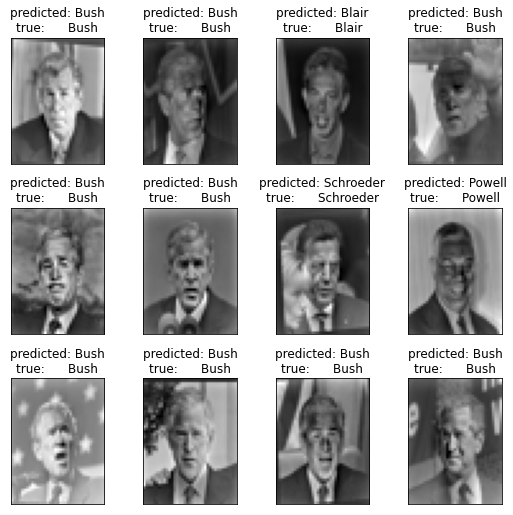


-------------------------------------------------------



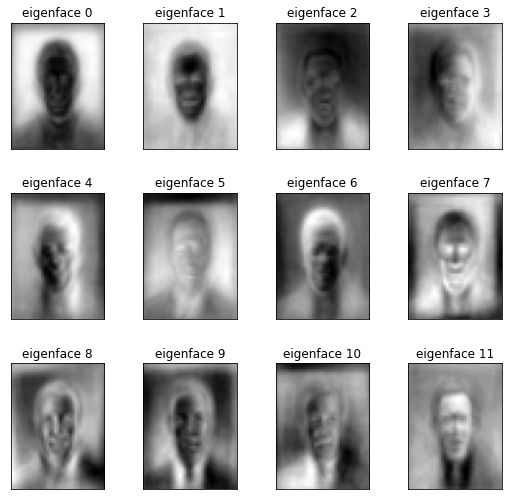

-----------------------------pca-----------------------------------------------

n_components    classification_report
50                      precision    recall  f1-score   support

     Ariel Sharon       0.91      0.77      0.83        13
     Colin Powell       0.89      0.80      0.84        60
  Donald Rumsfeld       0.52      0.48      0.50        27
    George W Bush       0.80      0.92      0.85       146
Gerhard Schroeder       0.63      0.76      0.69        25
      Hugo Chavez       0.67      0.13      0.22        15
       Tony Blair       0.58      0.50      0.54        36

         accuracy                           0.76       322
        macro avg       0.71      0.62      0.64       322
     weighted avg       0.75      0.76      0.74       322

100                     precision    recall  f1-score   support

     Ariel Sharon       0.92      0.85      0.88        13
     Colin Powell       0.87      0.92      0.89        60
  Donald Rumsfeld       0.72      0.67   

In [5]:
results_dict_acc = {}
results_dict_cla = {}
for n_components in [50,100,150,200,300,400]:

    print("\n====================================================================================================================================\n")
    print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
    t0 = time()
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
    print(" PCA  -  done in %0.3fs" % (time() - t0))
    eigenfaces_pca = pca.components_.reshape((n_components, h, w))
    print("Projecting the input data on the eigenfaces orthonormal basis - PCA")
    t0 = time()
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print("done in %0.3fs" % (time() - t0))
    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {"C": loguniform(1e3, 1e5),"gamma": loguniform(1e-4, 1e-1)}
    clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
    clf = clf.fit(X_train_pca, y_train)
    print("PCA - done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print("For PCA - ",clf.best_estimator_)
    print("PCA - Predicting people's names on the test set")
    t0 = time()
    y_pred = clf.predict(X_test_pca)
    print("done in %0.3fs" % (time() - t0))

    results_dict_acc[n_components] = accuracy_score(y_test, y_pred)
    results_dict_cla[n_components] = classification_report(y_test, y_pred, target_names=target_names)

    print(classification_report(y_test, y_pred, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()

    print("\n-------------------------------------------------------\n")

    prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
    plot_gallery(X_test, prediction_titles, h, w)
    plt.show()

    print("\n-------------------------------------------------------\n")

    eigenface_titles_pca = ["eigenface %d" % i for i in range(eigenfaces_pca.shape[0])]
    plot_gallery(eigenfaces_pca, eigenface_titles_pca, h, w)
    plt.show()


print("-----------------------------pca-----------------------------------------------\n")


print("{:<15} {:<15}".format('n_components','classification_report'))
for k,v in results_dict_cla.items():
    label = v
    print("{:<4} {:<7}".format(k, label))


print("-------------------------------pca---------------------------------------------\n")


print("{:<15} {:<15}".format('n_components','accuracy'))
for k,v in results_dict_acc.items():
    label = v
    print("{:<15} {:<15}".format(k, label))


print("----------------------------------pca------------------------------------------\n")





## ICA




Extracting the top 50 eigenfaces from 966 faces
 ICA - done in 0.713s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.011s
Fitting the classifier to the training set
ICA - done in 3.853s
Best estimator found by grid search:
For ICA -  SVC(C=6956.849326716803, class_weight='balanced', gamma=0.0025529803583296696)
PCA - Predicting people's names on the test set
done in 0.041s
                   precision    recall  f1-score   support

     Ariel Sharon       0.44      0.85      0.58        13
     Colin Powell       0.82      0.75      0.78        60
  Donald Rumsfeld       0.40      0.63      0.49        27
    George W Bush       0.93      0.82      0.87       146
Gerhard Schroeder       0.52      0.60      0.56        25
      Hugo Chavez       0.54      0.47      0.50        15
       Tony Blair       0.66      0.53      0.58        36

         accuracy                           0.73       322
        macro avg       0.61      0.66      0.62       322
     

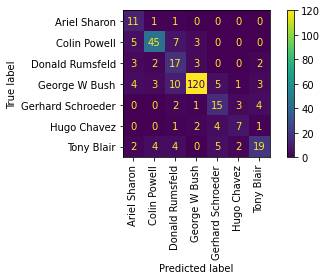


-------------------------------------------------------



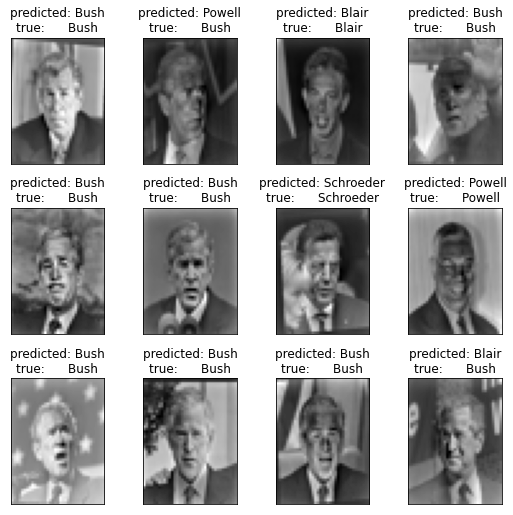


-------------------------------------------------------



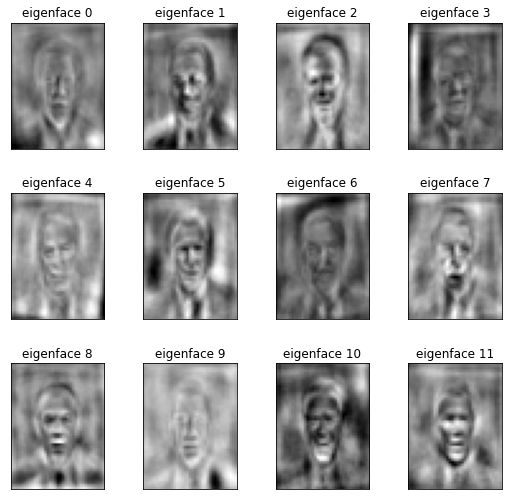



Extracting the top 100 eigenfaces from 966 faces
 ICA - done in 0.767s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.008s
Fitting the classifier to the training set
ICA - done in 4.274s
Best estimator found by grid search:
For ICA -  SVC(C=3110.0452303995366, class_weight='balanced', gamma=0.00035833434464205277)
PCA - Predicting people's names on the test set
done in 0.057s
                   precision    recall  f1-score   support

     Ariel Sharon       0.55      0.85      0.67        13
     Colin Powell       0.84      0.90      0.87        60
  Donald Rumsfeld       0.62      0.67      0.64        27
    George W Bush       0.95      0.86      0.90       146
Gerhard Schroeder       0.66      0.84      0.74        25
      Hugo Chavez       0.75      0.60      0.67        15
       Tony Blair       0.76      0.69      0.72        36

         accuracy                           0.82       322
        macro avg       0.73      0.77      0.74       322
  

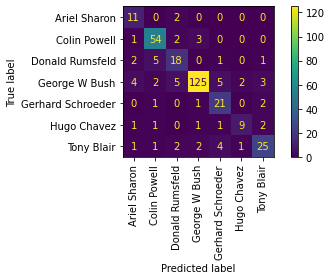


-------------------------------------------------------



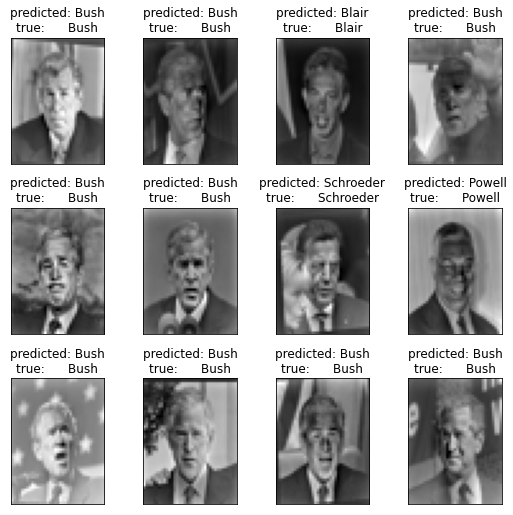


-------------------------------------------------------



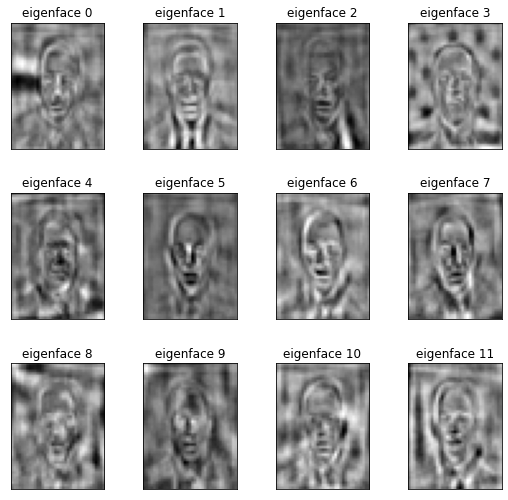



Extracting the top 150 eigenfaces from 966 faces
 ICA - done in 2.155s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.013s
Fitting the classifier to the training set
ICA - done in 5.098s
Best estimator found by grid search:
For ICA -  SVC(C=1129.8333194575348, class_weight='balanced', gamma=0.0011212339199546562)
PCA - Predicting people's names on the test set
done in 0.041s
                   precision    recall  f1-score   support

     Ariel Sharon       0.62      0.77      0.69        13
     Colin Powell       0.89      0.90      0.89        60
  Donald Rumsfeld       0.71      0.81      0.76        27
    George W Bush       0.95      0.86      0.90       146
Gerhard Schroeder       0.60      0.84      0.70        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.84      0.86      0.85        36

         accuracy                           0.84       322
        macro avg       0.78      0.81      0.78       322
   

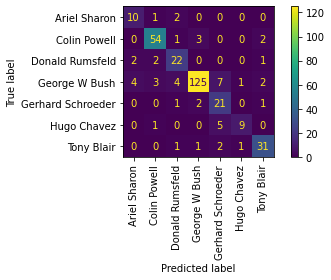


-------------------------------------------------------



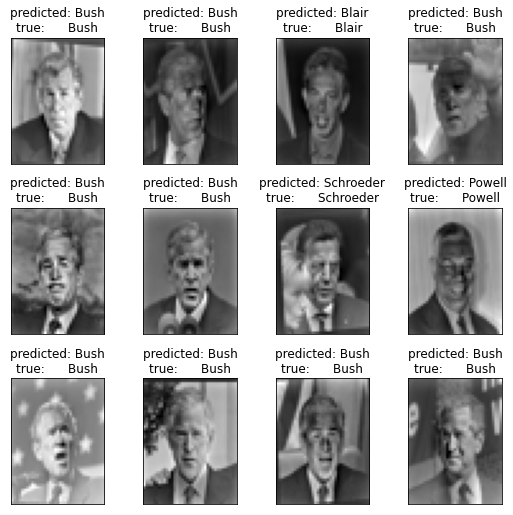


-------------------------------------------------------



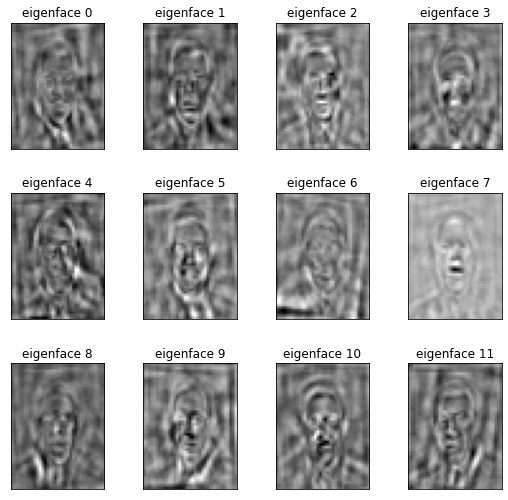



Extracting the top 200 eigenfaces from 966 faces
 ICA - done in 3.295s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.076s
Fitting the classifier to the training set
ICA - done in 7.010s
Best estimator found by grid search:
For ICA -  SVC(C=10685.636191285697, class_weight='balanced', gamma=0.00012552413064422088)
PCA - Predicting people's names on the test set
done in 0.062s
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.77      0.74        13
     Colin Powell       0.90      0.92      0.91        60
  Donald Rumsfeld       0.66      0.78      0.71        27
    George W Bush       0.94      0.85      0.89       146
Gerhard Schroeder       0.55      0.84      0.67        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.83      0.81      0.82        36

         accuracy                           0.84       322
        macro avg       0.78      0.79      0.78       322
  

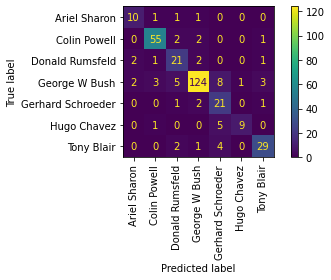


-------------------------------------------------------



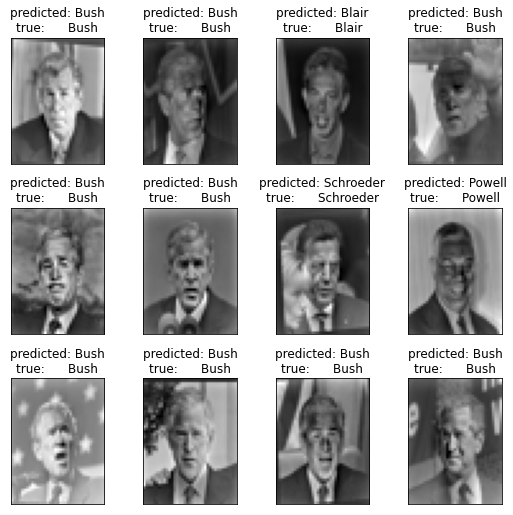


-------------------------------------------------------



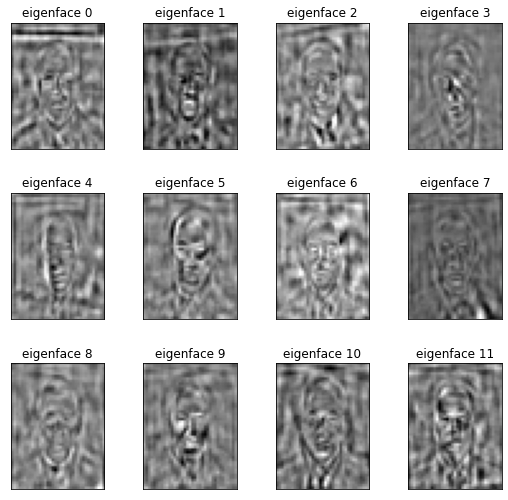



Extracting the top 300 eigenfaces from 966 faces
 ICA - done in 9.650s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.045s
Fitting the classifier to the training set
ICA - done in 7.834s
Best estimator found by grid search:
For ICA -  SVC(C=1814.5714310648193, class_weight='balanced', gamma=0.09245783547094893)
PCA - Predicting people's names on the test set
done in 0.054s
                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.77      0.74        13
     Colin Powell       0.78      0.85      0.82        60
  Donald Rumsfeld       0.58      0.70      0.63        27
    George W Bush       0.87      0.90      0.89       146
Gerhard Schroeder       0.76      0.64      0.70        25
      Hugo Chavez       0.70      0.47      0.56        15
       Tony Blair       0.89      0.67      0.76        36

         accuracy                           0.80       322
        macro avg       0.76      0.71      0.73       322
     

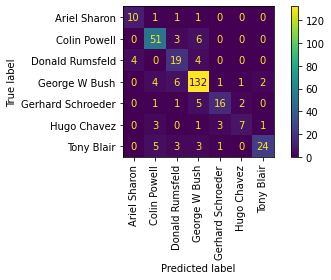


-------------------------------------------------------



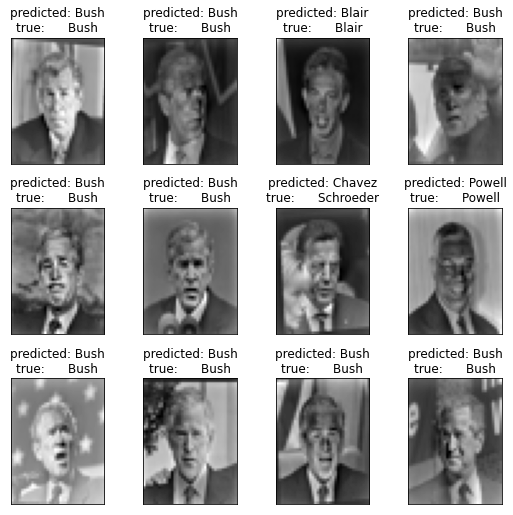


-------------------------------------------------------



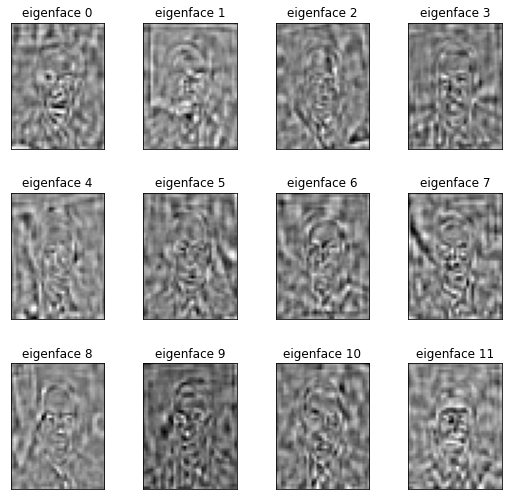



Extracting the top 400 eigenfaces from 966 faces
 ICA - done in 10.128s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.043s
Fitting the classifier to the training set
ICA - done in 10.242s
Best estimator found by grid search:
For ICA -  SVC(C=3667.614896843911, class_weight='balanced', gamma=0.0006312028690298031)
PCA - Predicting people's names on the test set
done in 0.070s
                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.77      0.77        13
     Colin Powell       0.76      0.85      0.80        60
  Donald Rumsfeld       0.54      0.70      0.61        27
    George W Bush       0.91      0.87      0.89       146
Gerhard Schroeder       0.74      0.68      0.71        25
      Hugo Chavez       0.73      0.53      0.62        15
       Tony Blair       0.85      0.78      0.81        36

         accuracy                           0.81       322
        macro avg       0.76      0.74      0.74       322
  

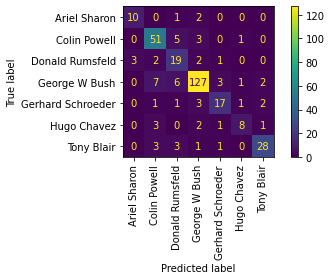


-------------------------------------------------------



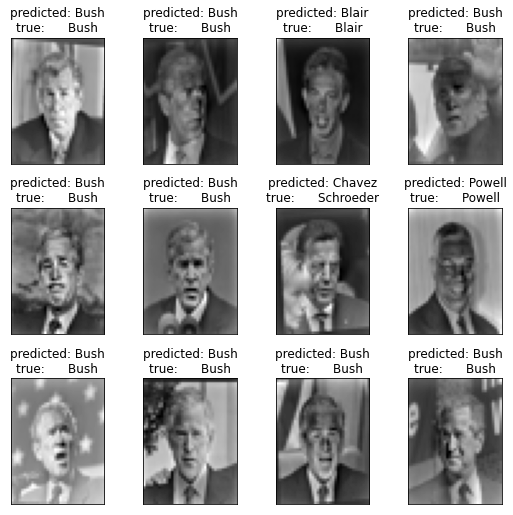


-------------------------------------------------------



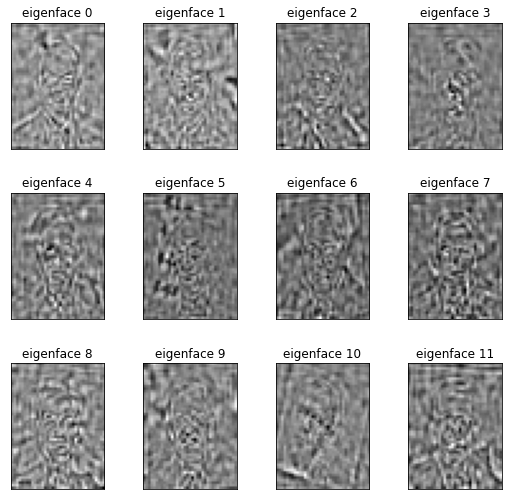

-----------------ICA-----------------------------------------------------------

n_components    classification_report
50                      precision    recall  f1-score   support

     Ariel Sharon       0.44      0.85      0.58        13
     Colin Powell       0.82      0.75      0.78        60
  Donald Rumsfeld       0.40      0.63      0.49        27
    George W Bush       0.93      0.82      0.87       146
Gerhard Schroeder       0.52      0.60      0.56        25
      Hugo Chavez       0.54      0.47      0.50        15
       Tony Blair       0.66      0.53      0.58        36

         accuracy                           0.73       322
        macro avg       0.61      0.66      0.62       322
     weighted avg       0.76      0.73      0.74       322

100                     precision    recall  f1-score   support

     Ariel Sharon       0.55      0.85      0.67        13
     Colin Powell       0.84      0.90      0.87        60
  Donald Rumsfeld       0.62      0.67   

In [6]:
results_dict_acc = {}
results_dict_cla = {}
rng = np.random.RandomState(42)


for n_components in [50,100,150,200,300,400]:
    print("\n==================================================================================================================================\n")
    print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
    t0 = time()
    ica = FastICA(n_components=n_components, random_state=rng, whiten="arbitrary-variance").fit(X_train)
    print(" ICA - done in %0.3fs" % (time() - t0))
    eigenfaces_ica = ica.components_.reshape((n_components, h, w))
    print("Projecting the input data on the eigenfaces orthonormal basis")
    t0 = time()
    X_train_ica = ica.transform(X_train)
    X_test_ica = ica.transform(X_test)
    print("done in %0.3fs" % (time() - t0))
    print("Fitting the classifier to the training set")
    t0 = time()
    param_grid = {"C": loguniform(1e3, 1e5),"gamma": loguniform(1e-4, 1e-1)}
    clf = RandomizedSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10)
    clf = clf.fit(X_train_ica, y_train)
    print("ICA - done in %0.3fs" % (time() - t0))
    print("Best estimator found by grid search:")
    print("For ICA - ",clf.best_estimator_)
    print("PCA - Predicting people's names on the test set")
    t0 = time()
    y_pred = clf.predict(X_test_ica)
    print("done in %0.3fs" % (time() - t0))

    results_dict_acc[n_components] = accuracy_score(y_test, y_pred)
    results_dict_cla[n_components] = classification_report(y_test, y_pred, target_names=target_names)

    print(classification_report(y_test, y_pred, target_names=target_names))
    ConfusionMatrixDisplay.from_estimator(clf, X_test_ica, y_test, display_labels=target_names, xticks_rotation="vertical")
    plt.tight_layout()
    plt.show()

    print("\n-------------------------------------------------------\n")

    prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]
    plot_gallery(X_test, prediction_titles, h, w)
    plt.show()

    print("\n-------------------------------------------------------\n")
    
    eigenface_titles_ica = ["eigenface %d" % i for i in range(eigenfaces_ica.shape[0])]
    plot_gallery(eigenfaces_ica, eigenface_titles_ica, h, w)
    plt.show()


print("-----------------ICA-----------------------------------------------------------\n")


print("{:<15} {:<15}".format('n_components','classification_report'))
for k,v in results_dict_cla.items():
    label = v
    print("{:<4} {:<7}".format(k, label))


print("----------------------ICA------------------------------------------------------\n")


print("{:<15} {:<15}".format('n_components','accuracy'))
for k,v in results_dict_acc.items():
    label = v
    print("{:<15} {:<15}".format(k, label))


print("---------------------------ICA-------------------------------------------------\n")


In [7]:


X_train = np.arange(2000).reshape(1000,2)
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(2000,2))
S[:,0] *= 2


X_train = np.dot(S,X_train.T)


pca = PCA()
S_pca_ = pca.fit(X_train).transform(X_train)

ica = FastICA(random_state=rng, whiten="arbitrary-variance")

S_ica_ = ica.fit(X_train).transform(X_train)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)






/Users/jaichandra/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


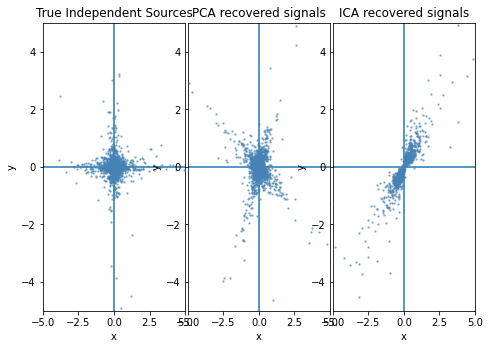

In [10]:
import matplotlib.pyplot as plt
z=5
n=[0] * 2000
def plot_samples(S, axis_list=None):
    plt.scatter(
        S[:,0],S[:,1], s=2, marker="o", zorder=10, color="steelblue", alpha=0.5
    )
    if axis_list is not None:
        for axis, color, label in axis_list:
            axis = axis / axis.std()
            x_axis = axis,
            y_axis = axis
            plt.quiver(
                (0, 0),
                (0, 0),
                x_axis,
                y_axis,
                zorder=11,
                width=0.01,
                scale=6,
                color=color,
                label=label,
            )

    plt.hlines(0, -z, z)
    plt.vlines(0, -z, z)
    plt.xlim(-z, z)
    plt.ylim(-z, z)
    plt.xlabel("x")
    plt.ylabel("y")


plt.figure()
plt.subplot(1,3, 1)
plot_samples(S / S.std())
plt.title("True Independent Sources")


plt.subplot(1,3, 2)
plot_samples(S_pca_/ np.std(S_pca_, axis=0))
plt.title("PCA recovered signals")

plt.subplot(1,3, 3)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title("ICA recovered signals")


plt.subplots_adjust(left=19, bottom=9, right=20, top=10, wspace=0.02, hspace=0.02)
plt.show()



Text(0.5, 1.0, 'Observations')

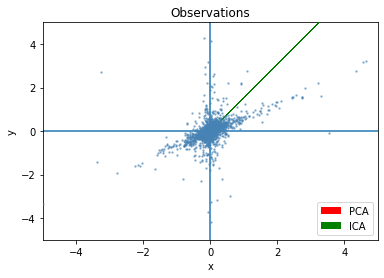

In [11]:
plt.figure()
pca_comp = pca.components_
ica_comp = ica.mixing_

pca_comp =  np.arange(2000).reshape(1000,2)
ica_comp  =  np.arange(2000).reshape(1000,2)

pca_comp = pca_comp/pca_comp.std()
ica_comp = ica_comp/ica_comp.std()


pca_comp =  np.arange(2000).reshape(1000,2)
ica_comp  =  np.arange(2000).reshape(1000,2)

S_pca_.shape,X_train.shape,pca_comp.shape

plot_samples(X_train / np.std(X_train, axis=0))
plt.quiver(n,n,pca_comp,pca_comp,scale=6,color="RED",zorder=7,width=0.001,label="PCA")
plt.quiver(n,n,ica_comp,ica_comp,scale=6,color="GREEN",zorder=7,width=0.001,label="ICA")
legend = plt.legend(loc="lower right")
legend.set_zorder(100)
plt.title("Observations")